MOBILE PRICE PREDICTION



In this Project,on the basis of the mobile Specification like Battery power, 3G enabled , wifi ,Bluetooth, Ram etc we are decidind which of them have more impact on price


* In this data:
    * id:ID
    * battery_power:Total energy a battery can store in one time measured in mAh
    * blue:Has bluetooth or not
    * clock_speed:speed at which microprocessor executes instructions
    * dual_sim:Has dual sim support or not
    * fc:Front Camera mega pixels
    * four_g:Has 4G or not
    * int_memory:Internal Memory in Gigabytes
    * m_dep:Mobile Depth in cm
    * mobile_wt:Weight of mobile phone
    * n_cores:Number of cores of processor
    * pc:Primary Camera mega pixels
    * px_height:Pixel Resolution Height
    * px_width:Pixel Resolution Width
    * ram:Random Access Memory in Megabytes
    * sc_h:Screen Height of mobile in cm
    * sc_w:Screen Width of mobile in cm
    * talk_time:longest time that a single battery charge will last when you are
    * three_g:Has 3G or not
    * touch_screen:Has touch screen or not
    * wifi:Has wifi or not





About this Dataset
Context
Bob has started his own mobile company. He wants to give tough fight to big companies like Apple,Samsung etc.

He does not know how to estimate price of mobiles his company creates. In this competitive mobile phone market you cannot simply assume things. To solve this problem he collects sales data of mobile phones of various companies.

Bob wants to find out some relation between features of a mobile phone(eg:- RAM,Internal Memory etc) and its selling price. But he is not so good at Machine Learning. So he needs your help to solve this problem.

In this problem you do not have to predict actual price but a price range indicating how high the price is

## Load Data

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import preprocessing

pd.set_option("display.max_row",500)
pd.set_option("display.max_column",500)
import warnings
warnings.filterwarnings("ignore")

import matplotlib
import seaborn

from sklearn.model_selection import train_test_split
from sklearn import tree
import graphviz
from sklearn.metrics import accuracy_score

In [2]:
SMALL_SIZE = 5
matplotlib.rc('font', size=SMALL_SIZE)
matplotlib.rc('axes', titlesize=SMALL_SIZE)

sns.set_style("ticks")

In [3]:
dataset=pd.read_csv('input/train.csv')

## Data Pre-processing

In [4]:
#Write your code here:
#Null values and missing data detection
#Oultier analysis

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
battery_power    2000 non-null int64
blue             2000 non-null int64
clock_speed      2000 non-null float64
dual_sim         2000 non-null int64
fc               2000 non-null int64
four_g           2000 non-null int64
int_memory       2000 non-null int64
m_dep            2000 non-null float64
mobile_wt        2000 non-null int64
n_cores          2000 non-null int64
pc               2000 non-null int64
px_height        2000 non-null int64
px_width         2000 non-null int64
ram              2000 non-null int64
sc_h             2000 non-null int64
sc_w             2000 non-null int64
talk_time        2000 non-null int64
three_g          2000 non-null int64
touch_screen     2000 non-null int64
wifi             2000 non-null int64
price_range      2000 non-null int64
dtypes: float64(2), int64(19)
memory usage: 328.2 KB


In [6]:
dataset.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


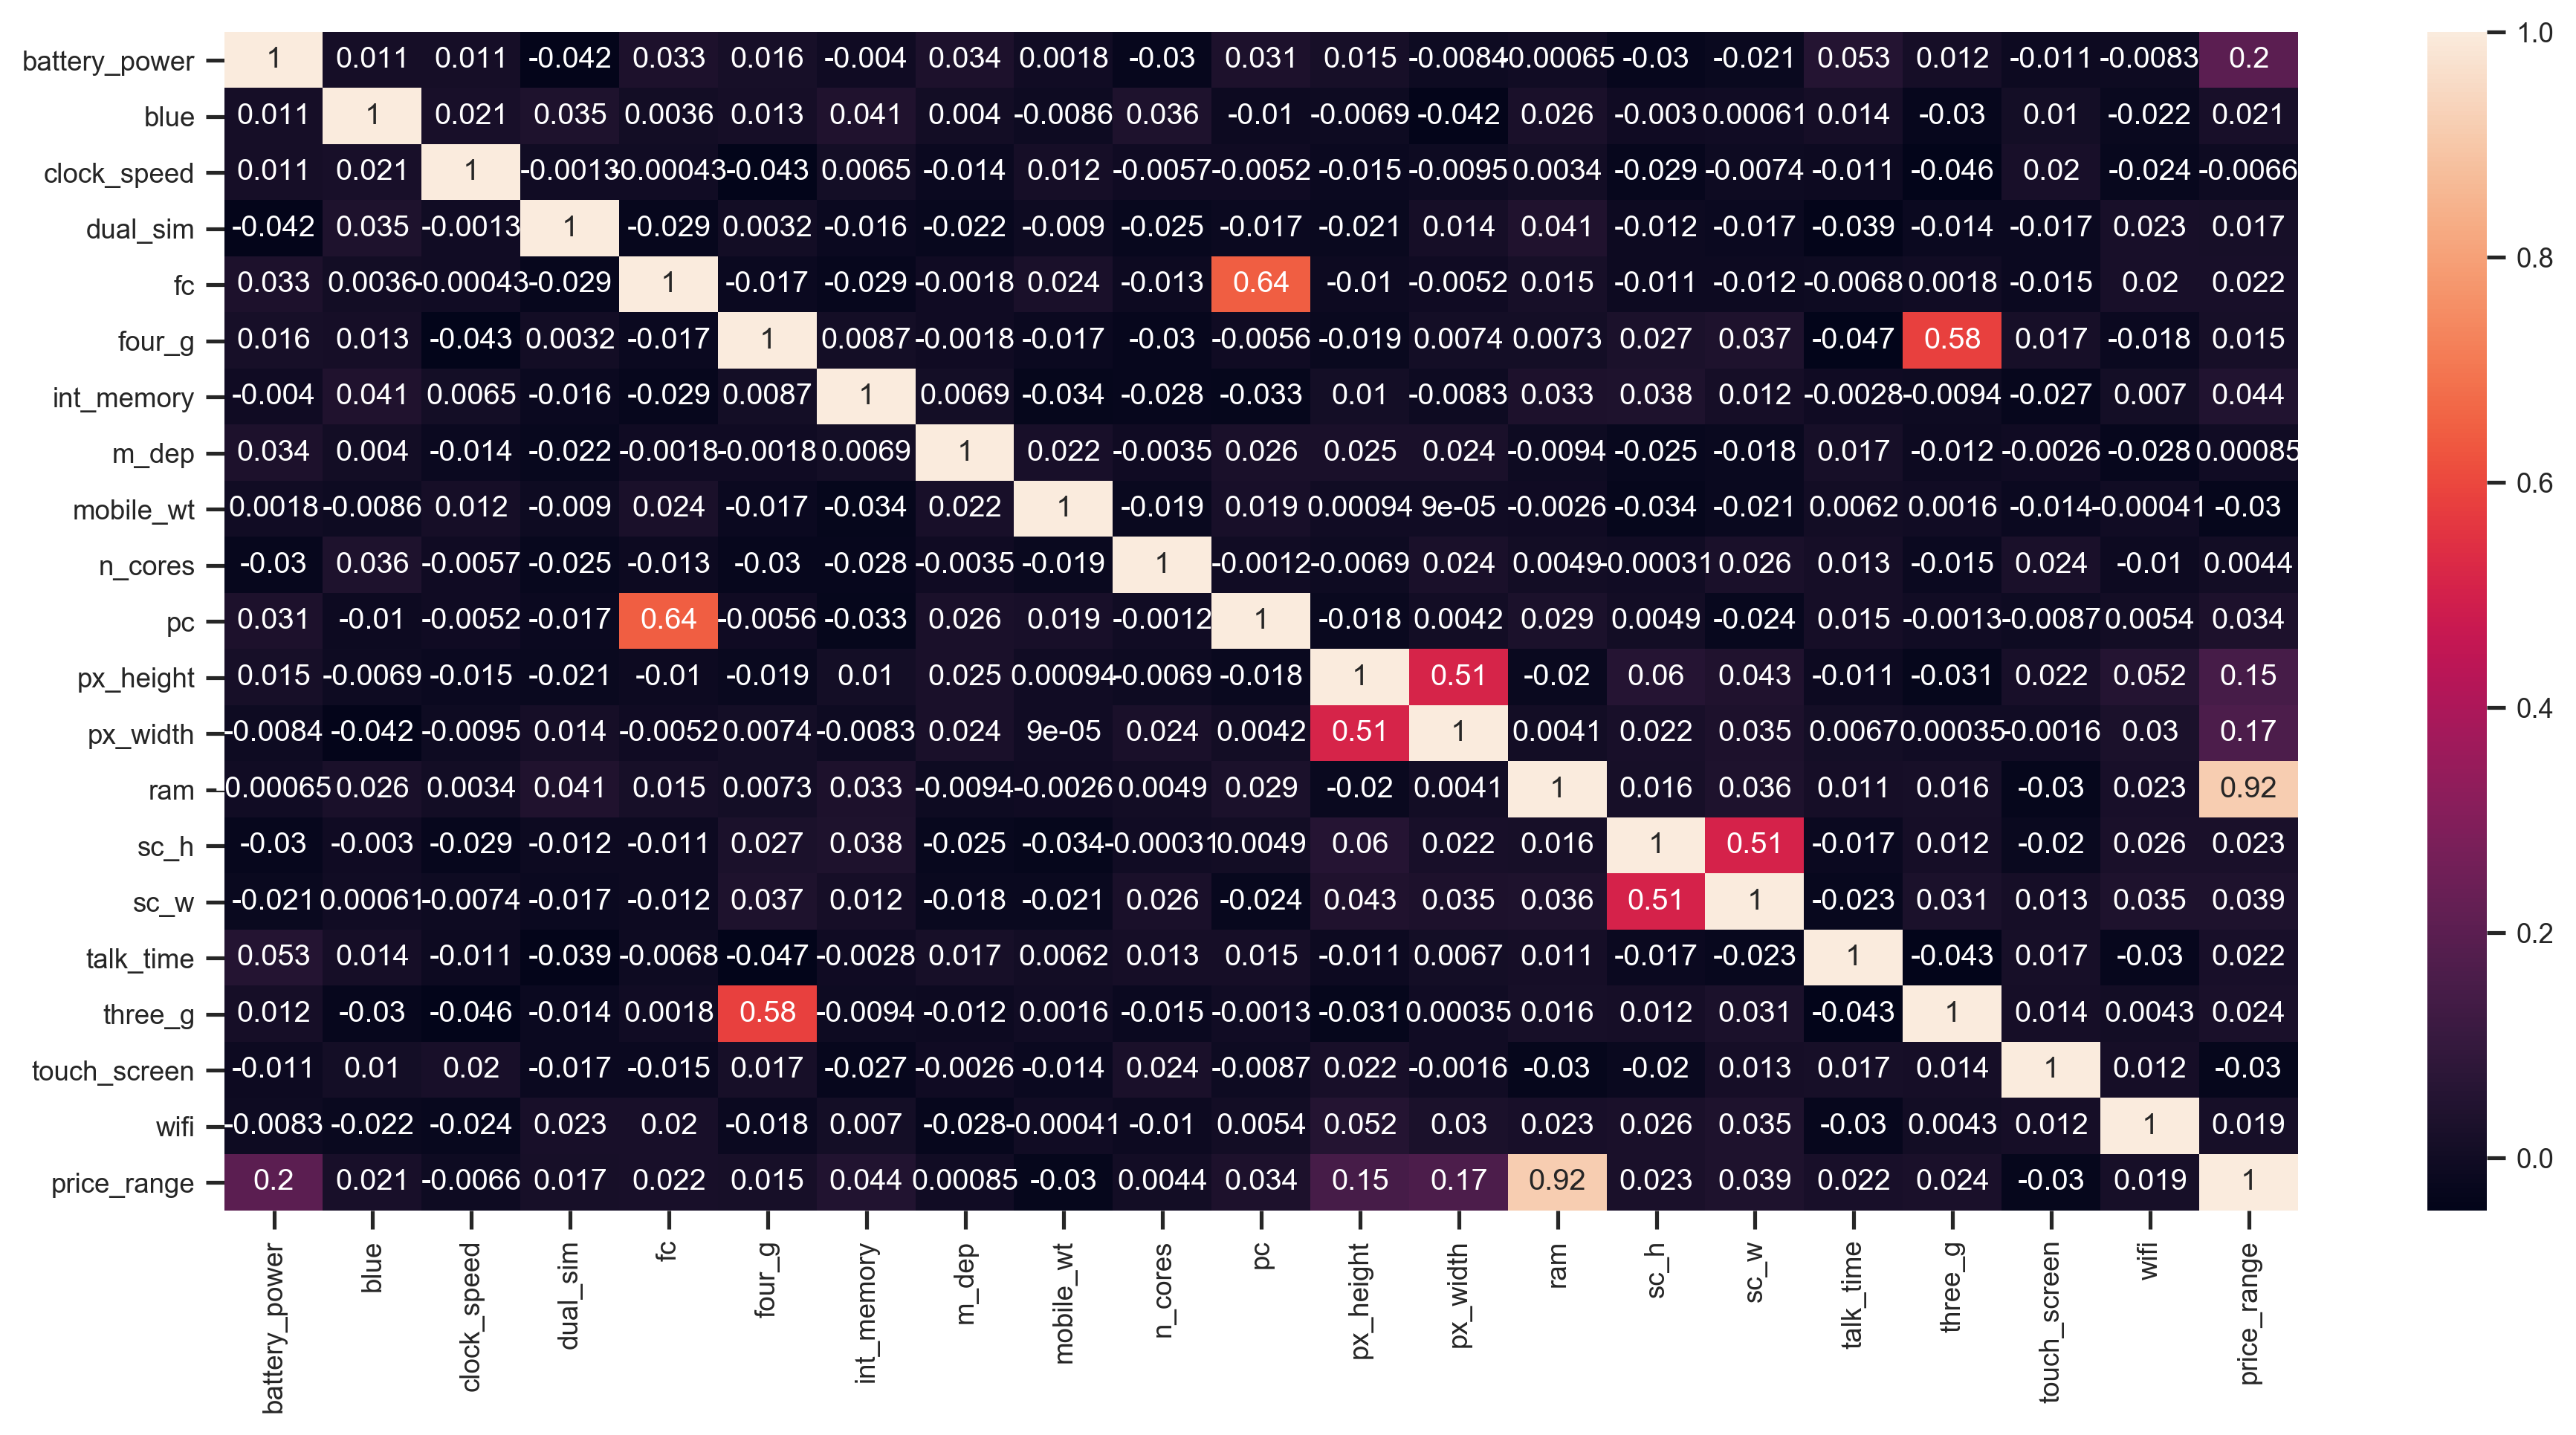

In [19]:
col = dataset.columns
x = dataset.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled, columns=col)

correlation_matrix = np.corrcoef(x.T)
sns.set(font_scale=0.8)
sns.set_style("ticks")
#print(correlation_matrix)
plt.figure(figsize=(15,7), dpi=300)
sns.heatmap(df.corr(), annot=True)
plt.savefig("img/00_corr.png")

In [8]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,0.227789,0.0,0.68,0.0,0.052632,0.0,0.080645,0.555556,0.900000,0.142857,0.10,0.010204,0.170895,0.612774,0.285714,0.388889,0.944444,0.0,0.0,1.0,0.333333
1,0.347361,1.0,0.00,1.0,0.000000,1.0,0.822581,0.666667,0.466667,0.285714,0.30,0.461735,0.993324,0.634687,0.857143,0.166667,0.277778,1.0,1.0,0.0,0.666667
2,0.041416,1.0,0.00,1.0,0.105263,1.0,0.629032,0.888889,0.541667,0.571429,0.30,0.644388,0.811749,0.627205,0.428571,0.111111,0.388889,1.0,1.0,0.0,0.666667
3,0.076152,1.0,0.80,0.0,0.000000,0.0,0.129032,0.777778,0.425000,0.714286,0.45,0.620408,0.858478,0.671566,0.785714,0.444444,0.500000,1.0,0.0,0.0,0.666667
4,0.881764,1.0,0.28,0.0,0.684211,1.0,0.677419,0.555556,0.508333,0.142857,0.70,0.616327,0.475300,0.308658,0.214286,0.111111,0.722222,1.0,1.0,0.0,0.333333


In [9]:
pd.DataFrame(dataset["m_dep"].value_counts()).sort_index()

,m_dep
0.1,320
0.2,213
0.3,199
0.4,168
0.5,205
0.6,186
0.7,200
0.8,208
0.9,195
1.0,106


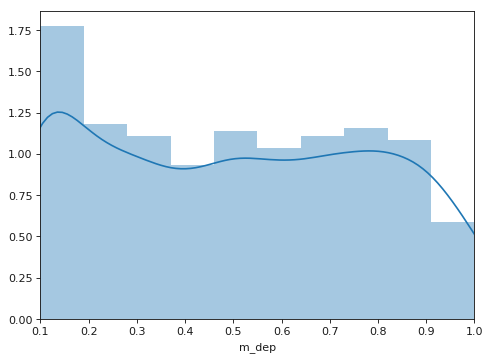

In [36]:

plt.style.use('default')

dataset["m_dep"].value_counts()
plt.figure(figsize=(7,5), dpi=80)
sns.distplot(dataset["m_dep"], bins=10)
plt.xticks(list((dataset.groupby("m_dep").size()).keys()))
plt.xlim(xmin=0.1, xmax=1.0);
plt.savefig("img/01_dist_mdep")

col_measures = dataset[["px_width", "px_height", "sc_h", "sc_w", "price_range"]].columns
x_screen_px_mobile = dataset[["px_width", "px_height", "sc_h", "sc_w", "price_range"]].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x_screen_px_mobile)
df = pd.DataFrame(x_scaled, columns=col_measures)

correlation_matrix = np.corrcoef(x_screen_px_mobile.T)
#print(correlation_matrix)
plt.figure(figsize=(5,3), dpi=100)
sns.heatmap(df.corr(), annot=True);

plt.figure(figsize=(10,5), dpi=150)
sns.distplot(dataset["px_height"], bins=50)
sns.distplot(dataset["px_width"], bins=50)
plt.savefig("img/01_px_width_px_height_dist");

In [11]:
dataset.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [12]:
def dist_joint(dist_val, joint_val, color_hex, dist_save, joint_save, bin_):
    sns.set_style("ticks")
    sns.set_context("notebook", font_scale=1.1, rc={"lines.linewidth": 1.1})
    sns.jointplot(x=joint_val,y=dist_val, data=dataset, color=color_hex, kind='kde',height=7).savefig("img/"+joint_save+".png")
    plt.figure(figsize=(7,5), dpi=80)
    sns.distplot(dataset[dist_val], bins=bin_, color=color_hex)
    plt.savefig("img/"+dist_save+".png")
    
def joint_graph(j1, j2, color_hex, save):
    sns.set_style("ticks")
    sns.set_context("notebook", font_scale=1.1, rc={"lines.linewidth": 1.1})
    sns.jointplot(x=j1,y=j2, data=dataset, color=color_hex, kind='kde',height=7).savefig("img/"+save+".png")

sns.set_context("notebook", font_scale=1.1, rc={"lines.linewidth": 1.1})

#sns.set(font_scale=2)
#sns.set_style("ticks")
sns.jointplot(x='price_range',y='px_height', data=dataset, color='#f17b39', kind='kde',height=7).savefig("img/01_priceVSpxheight.png")
plt.figure(figsize=(7,5), dpi=80)

sns.distplot(dataset["px_height"], bins=50, color="#f17b39")
plt.savefig("img/01_dist_pxheight.png")



#dataset.groupby(["px_height", "px_width"]).size()
#sns.jointplot(x='px_width',y='px_height', data=dataset, color='orange', kind='kde',height=7);

sns.jointplot(x='price_range',y='px_height', data=df, color='orange', kind='kde',height=7).savefig("img/01_priceVSpxheight.png")
sns.jointplot(x='price_range',y='px_width', data=df, color='orange', kind='kde',height=7).savefig("img/01_priceVSpxwidth.png")
sns.jointplot(x='px_width',y='px_height', data=df, color='orange', kind='kde',height=7).savefig("img/01_pxwidthVSpxheight.png")

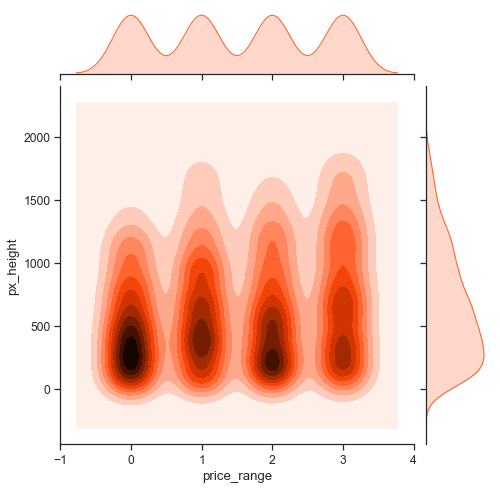

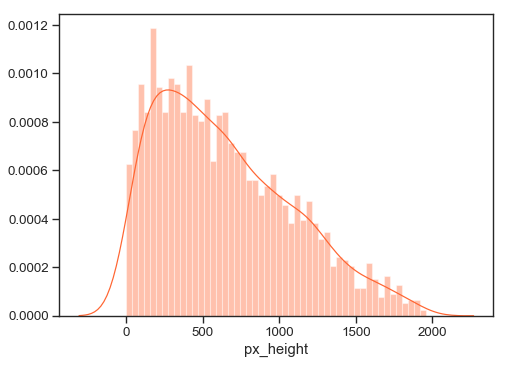

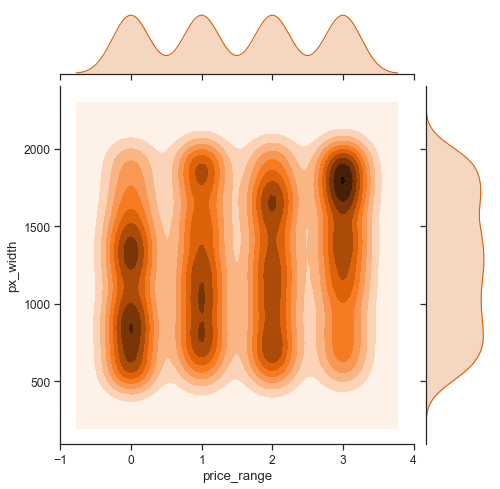

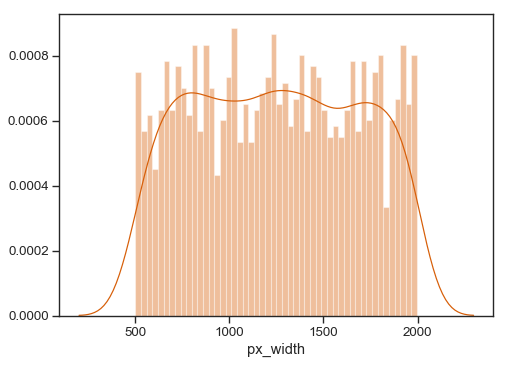

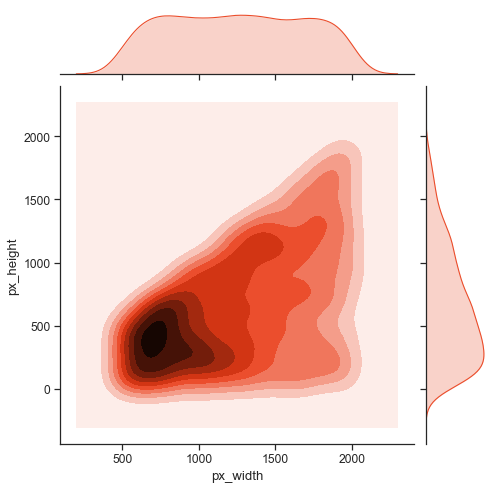

In [13]:
dist_joint("px_height", "price_range", "#ff6633", "01_dist_pxheight", "01_priceVSpxheight", 50)
dist_joint("px_width", "price_range", "#d75f09", "01_dist_pxwidth", "01_priceVSpxwidth", 50)
joint_graph("px_width", "px_height", "#eb4c2a", "01_pxheightVSpxwidth")

#dataset.groupby(["sc_h", "sc_w"]).size()
#sns.jointplot(x='sc_h',y='sc_w',data=dataset,color='red',kind='kde',height=7);
sns.jointplot(x='price_range',y='sc_w',data=df,color='red',kind='kde',height=7).savefig("img/02_priceVSscw.png")
sns.jointplot(x='price_range',y='sc_h',data=df,color='red',kind='kde',height=7).savefig("img/02_priceVSsch.png")
sns.jointplot(x='sc_h',y='sc_w',data=df,color='red',kind='kde',height=7).savefig("img/02_schVSscw.png")

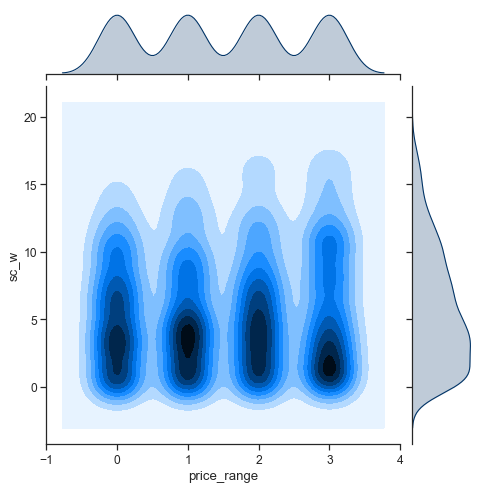

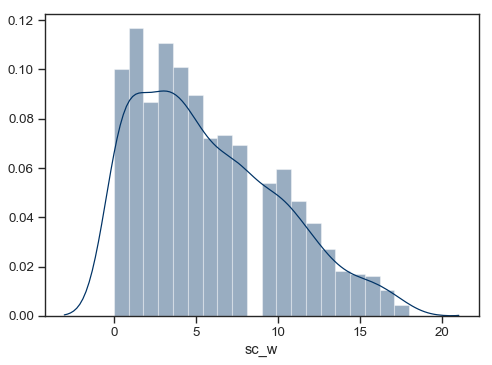

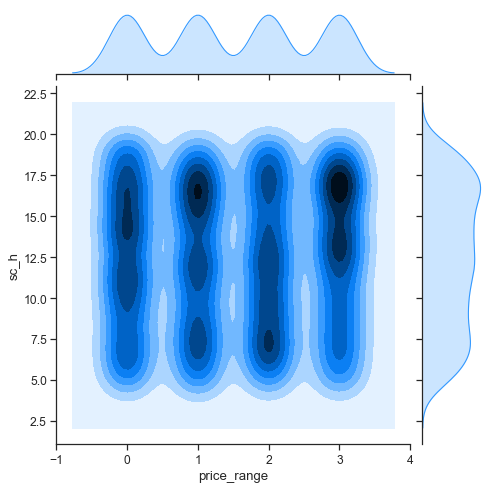

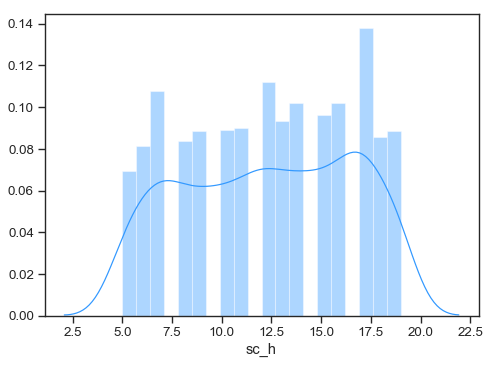

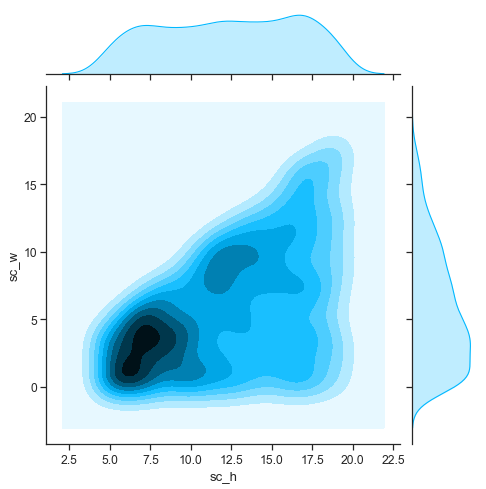

In [14]:
dist_joint("sc_w", "price_range", "#003366", "02_dist_scw", "02_priceVSscw", 20)
dist_joint("sc_h", "price_range", "#3399ff", "02_dist_sch", "02_priceVSsch", 20)
joint_graph("sc_h", "sc_w", "#00b8ff", "02_schVSscw")

df["sc"] = df.sc_h * df.sc_w
df["px"] = df.px_height * df.px_width

plt.figure(figsize=(5,3), dpi=100)
sns.heatmap(df[["sc","px"]].corr(), annot=True);

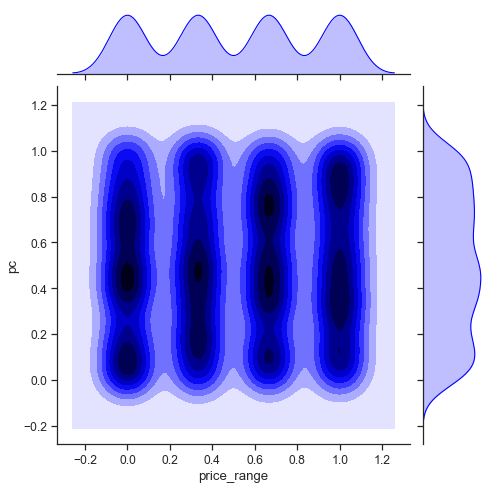

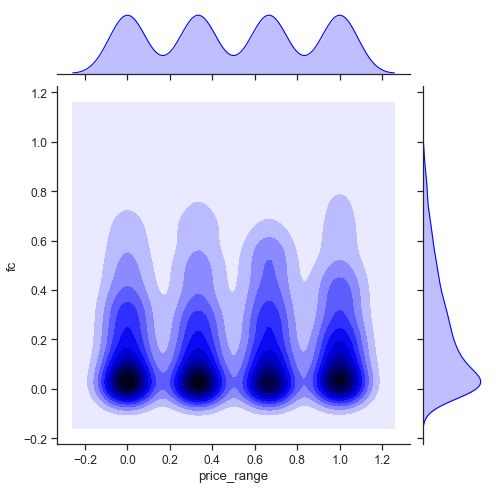

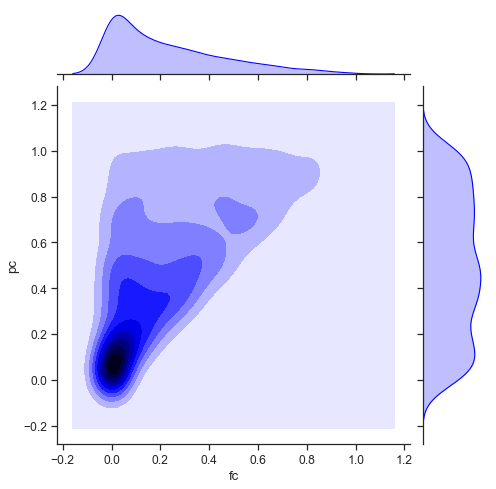

In [15]:
""#dataset.groupby(["sc_h", "sc_w"]).size()
sns.jointplot(x='price_range',y='pc',data=df,color='blue',kind='kde', height=7).savefig("img/03_priceVSpc.png")
sns.jointplot(x='price_range',y='fc',data=df,color='blue',kind='kde', height=7).savefig("img/03_priceVSfc.png")
sns.jointplot(x='fc',y='pc',data=df,color='blue',kind='kde', height=7).savefig("img/03_fcVSpc.png")

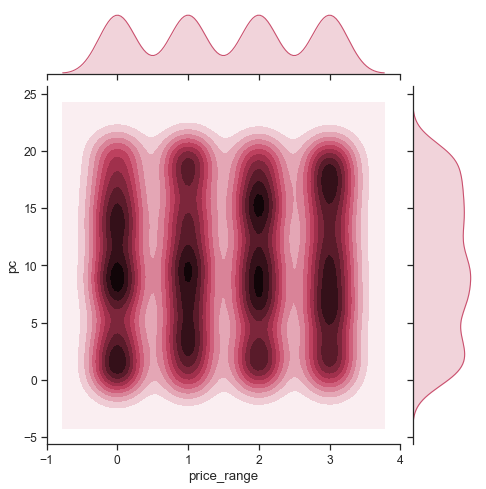

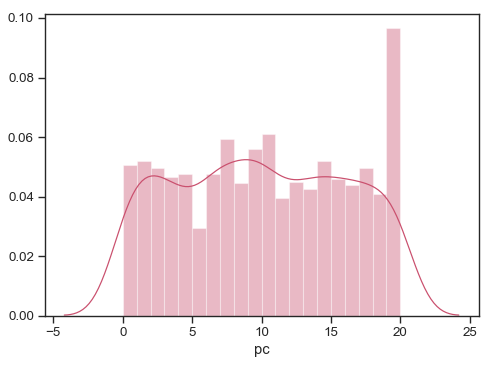

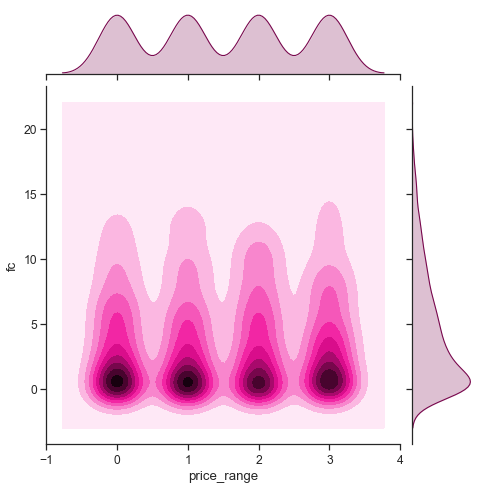

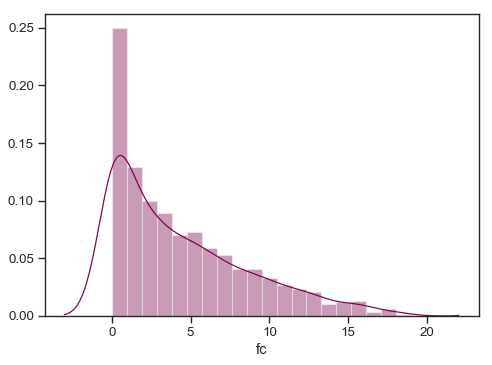

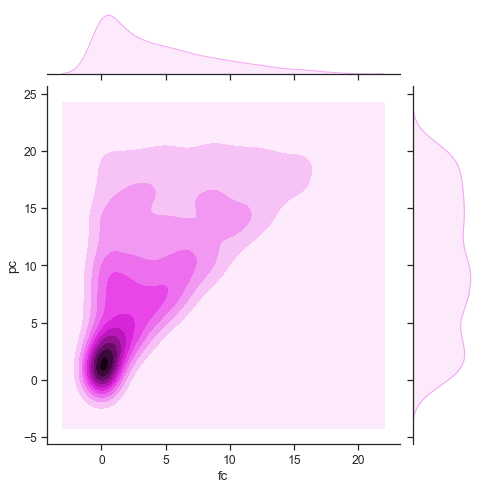

In [16]:
dist_joint("pc", "price_range", "#ca506e", "03_dist_pc", "03_priceVSpc", 20)
dist_joint("fc", "price_range", "#78074d", "03_dist_fc", "03_priceVSfc", 20)
joint_graph("fc", "pc", "#f4a8f4", "03_fcVSpc")

dataset.columns
col = ['battery_power', 'blue', 'clock_speed', 'dual_sim', 'four_g',
       'int_memory', 'mobile_wt', 'n_cores', 'px_height',
       'px_width', 'ram', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range']
x = dataset[col].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled, columns=col)

correlation_matrix = np.corrcoef(x.T)
#print(correlation_matrix)
plt.figure(figsize=(15,7), dpi=300)
sns.heatmap(df.corr(), annot=True)
plt.savefig("img/04_corr.png")

#dataset.groupby(["sc_h", "sc_w"]).size()
sns.jointplot(x='price_range',y='battery_power',data=df,color='maroon',kind='kde', height=7).savefig("img/05_priceVSbattery.png");
#sns.jointplot(x='price_range',y='blue',data=df,color='maroon',kind='kde', height=7).savefig("img/06_priceVSblue.png");
sns.jointplot(x='price_range',y='clock_speed',data=df,color='maroon',kind='kde', height=7).savefig("img/05_priceVSclock.png");
#sns.jointplot(x='price_range',y='dual_sim',data=df,color='maroon',kind='kde', height=7).savefig("img/06_priceVS.png");
#sns.jointplot(x='price_range',y='four_g',data=df,color='maroon',kind='kde', height=7).savefig("img/06_priceVS.png");
sns.jointplot(x='price_range',y='int_memory',data=df,color='maroon',kind='kde', height=7).savefig("img/05_priceVSmemory.png")
sns.jointplot(x='price_range',y='n_cores',data=df,color='maroon',kind='kde', height=7).savefig("img/05_priceVScores.png")
sns.jointplot(x='price_range',y='ram',data=df,color='maroon',kind='kde', height=7).savefig("img/05_priceVSram.png")
sns.jointplot(x='price_range',y='talk_time',data=df,color='maroon',kind='kde', height=7).savefig("img/05_priceVStalk.png")
#sns.set_ylabel("Y Label",fontsize=20)
#sns.jointplot(x='price_range',y='three_g',data=df,color='maroon',kind='kde', height=7).savefig("img/06_priceVS.png")
#sns.jointplot(x='price_range',y='touch_screen',data=df,color='maroon',kind='kde', height=7).savefig("img/06_priceVS.png")
#sns.jointplot(x='price_range',y='wifi',data=df,color='maroon',kind='kde', height=7).savefig("img/06_priceVS.png")

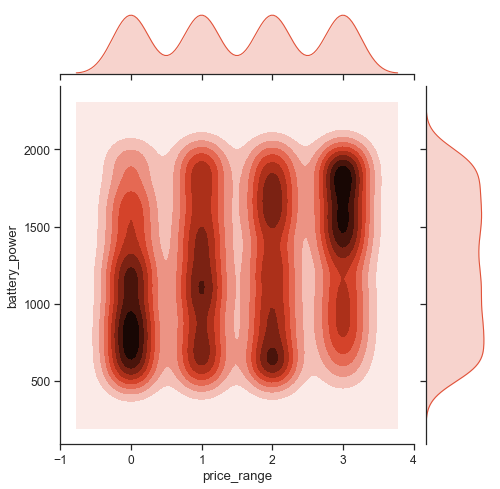

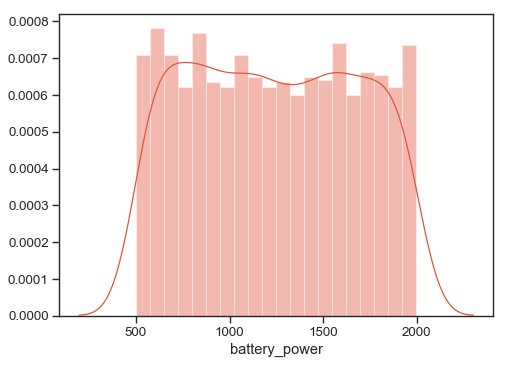

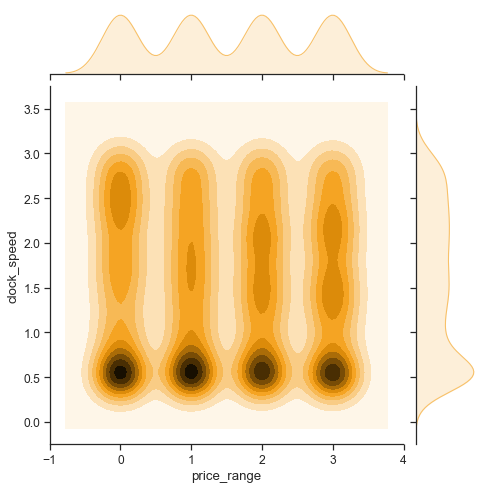

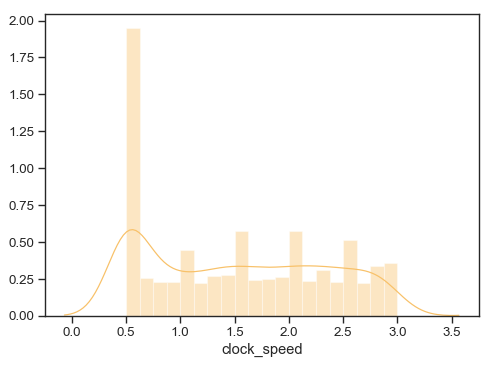

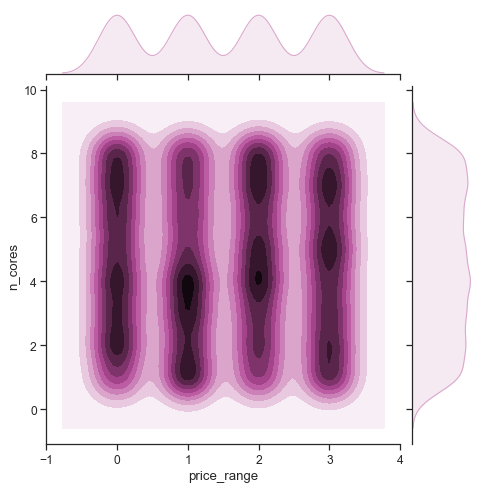

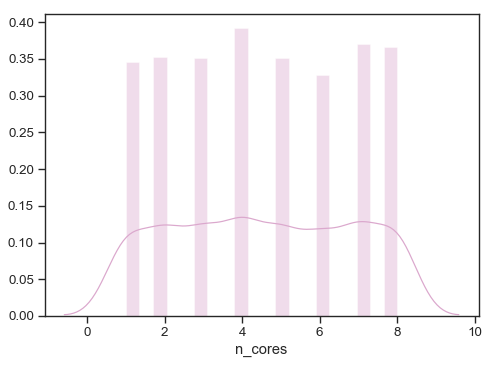

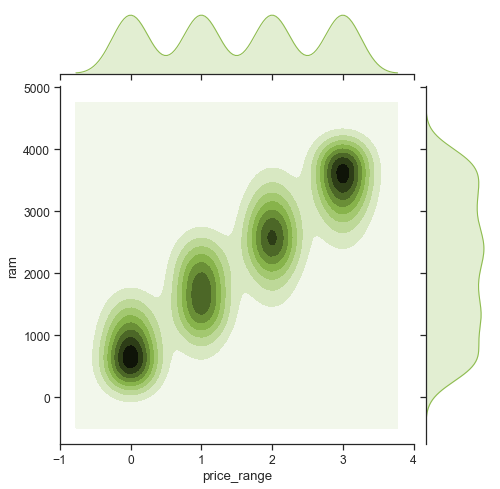

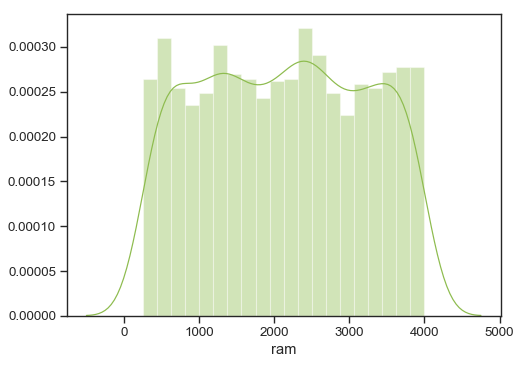

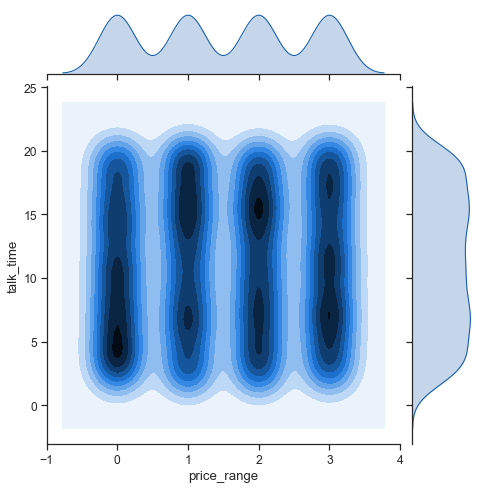

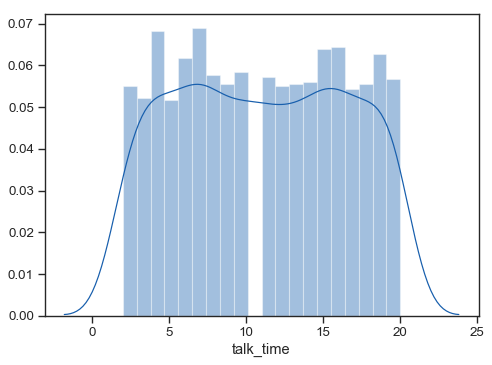

In [17]:
#joint_graph("price_range", "battery_power", "#e15239", "04_priceVSbattery_power")
#joint_graph("price_range", "clock_speed", "#f8c169", "04_priceVSclock_speed")
#joint_graph("int_memory", "price_range", "", "04_priceVSint_memory")
#joint_graph("price_range", "n_cores", "#dba8cd", "04_priceVSn_cores")
#joint_graph("price_range", "ram", "#8ebc4f", "04_priceVSram")
#joint_graph("price_range", "talk_time", "#185fad", "04_priceVStalk_time")

dist_joint("battery_power", "price_range", "#e15239", "04_dist_battery", "04_priceVSbattery", 20)
dist_joint("clock_speed", "price_range", "#f8c169", "04_dist_clock", "04_priceVSclock", 20)
dist_joint("n_cores", "price_range", "#dba8cd", "04_dist_cores", "04_priceVSn_cores", 20)
dist_joint("ram", "price_range", "#8ebc4f", "04_dist_ram", "04_priceVSram", 20)
dist_joint("talk_time", "price_range", "#185fad", "04_dist_talk", "04_priceVStalk", 20)




In [37]:
pd.DataFrame(dataset.clock_speed.value_counts()).sort_index()

,clock_speed
0.5,413
0.6,74
0.7,64
0.8,58
0.9,58
1.0,61
1.1,51
1.2,56
1.3,68
1.4,70


In [38]:
pd.DataFrame(dataset.n_cores.value_counts()).sort_index()

,n_cores
1,242
2,247
3,246
4,274
5,246
6,230
7,259
8,256


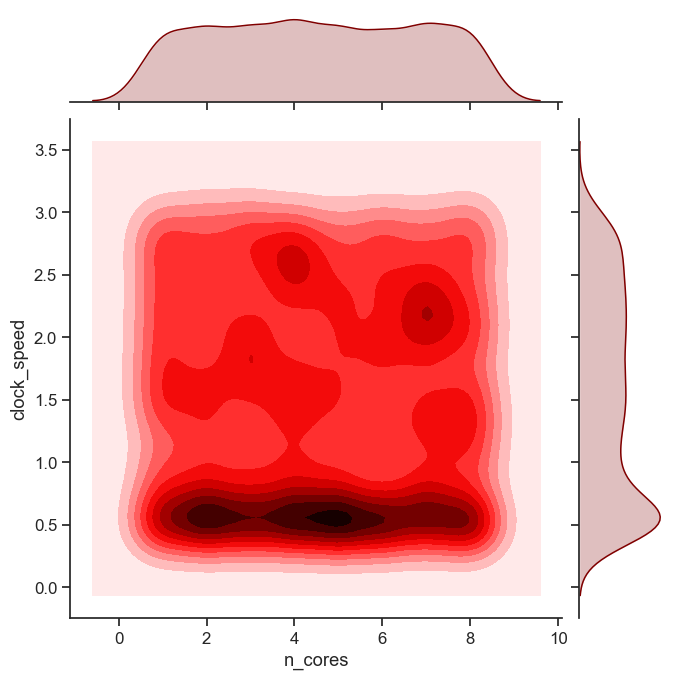

In [40]:
#sns.jointplot(x='n_cores',y='clock_speed',data=dataset,color='pink',kind='kde', height=7).savefig("img/06_coresVSspeed.png")

joint_graph("n_cores", "clock_speed", "#800000", "05_coresVSspeed")

In [47]:
#pd.DataFrame(dataset[["blue","dual_sim","four_g","touch_screen","wifi"]].groupby(["blue","dual_sim","four_g","touch_screen","wifi"]).size())
dataset["bs43tw"] = (dataset["blue"].astype(str) + \
                    dataset["dual_sim"].astype(str) + \
                    dataset["four_g"].astype(str) + \
                    dataset["three_g"].astype(str) + \
                    dataset["touch_screen"].astype(str) + \
                    dataset["wifi"].astype(str))#.astype(int)
dataset.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,bs43tw
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1,000001
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2,111110
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2,111110
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2,100100
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1,101110


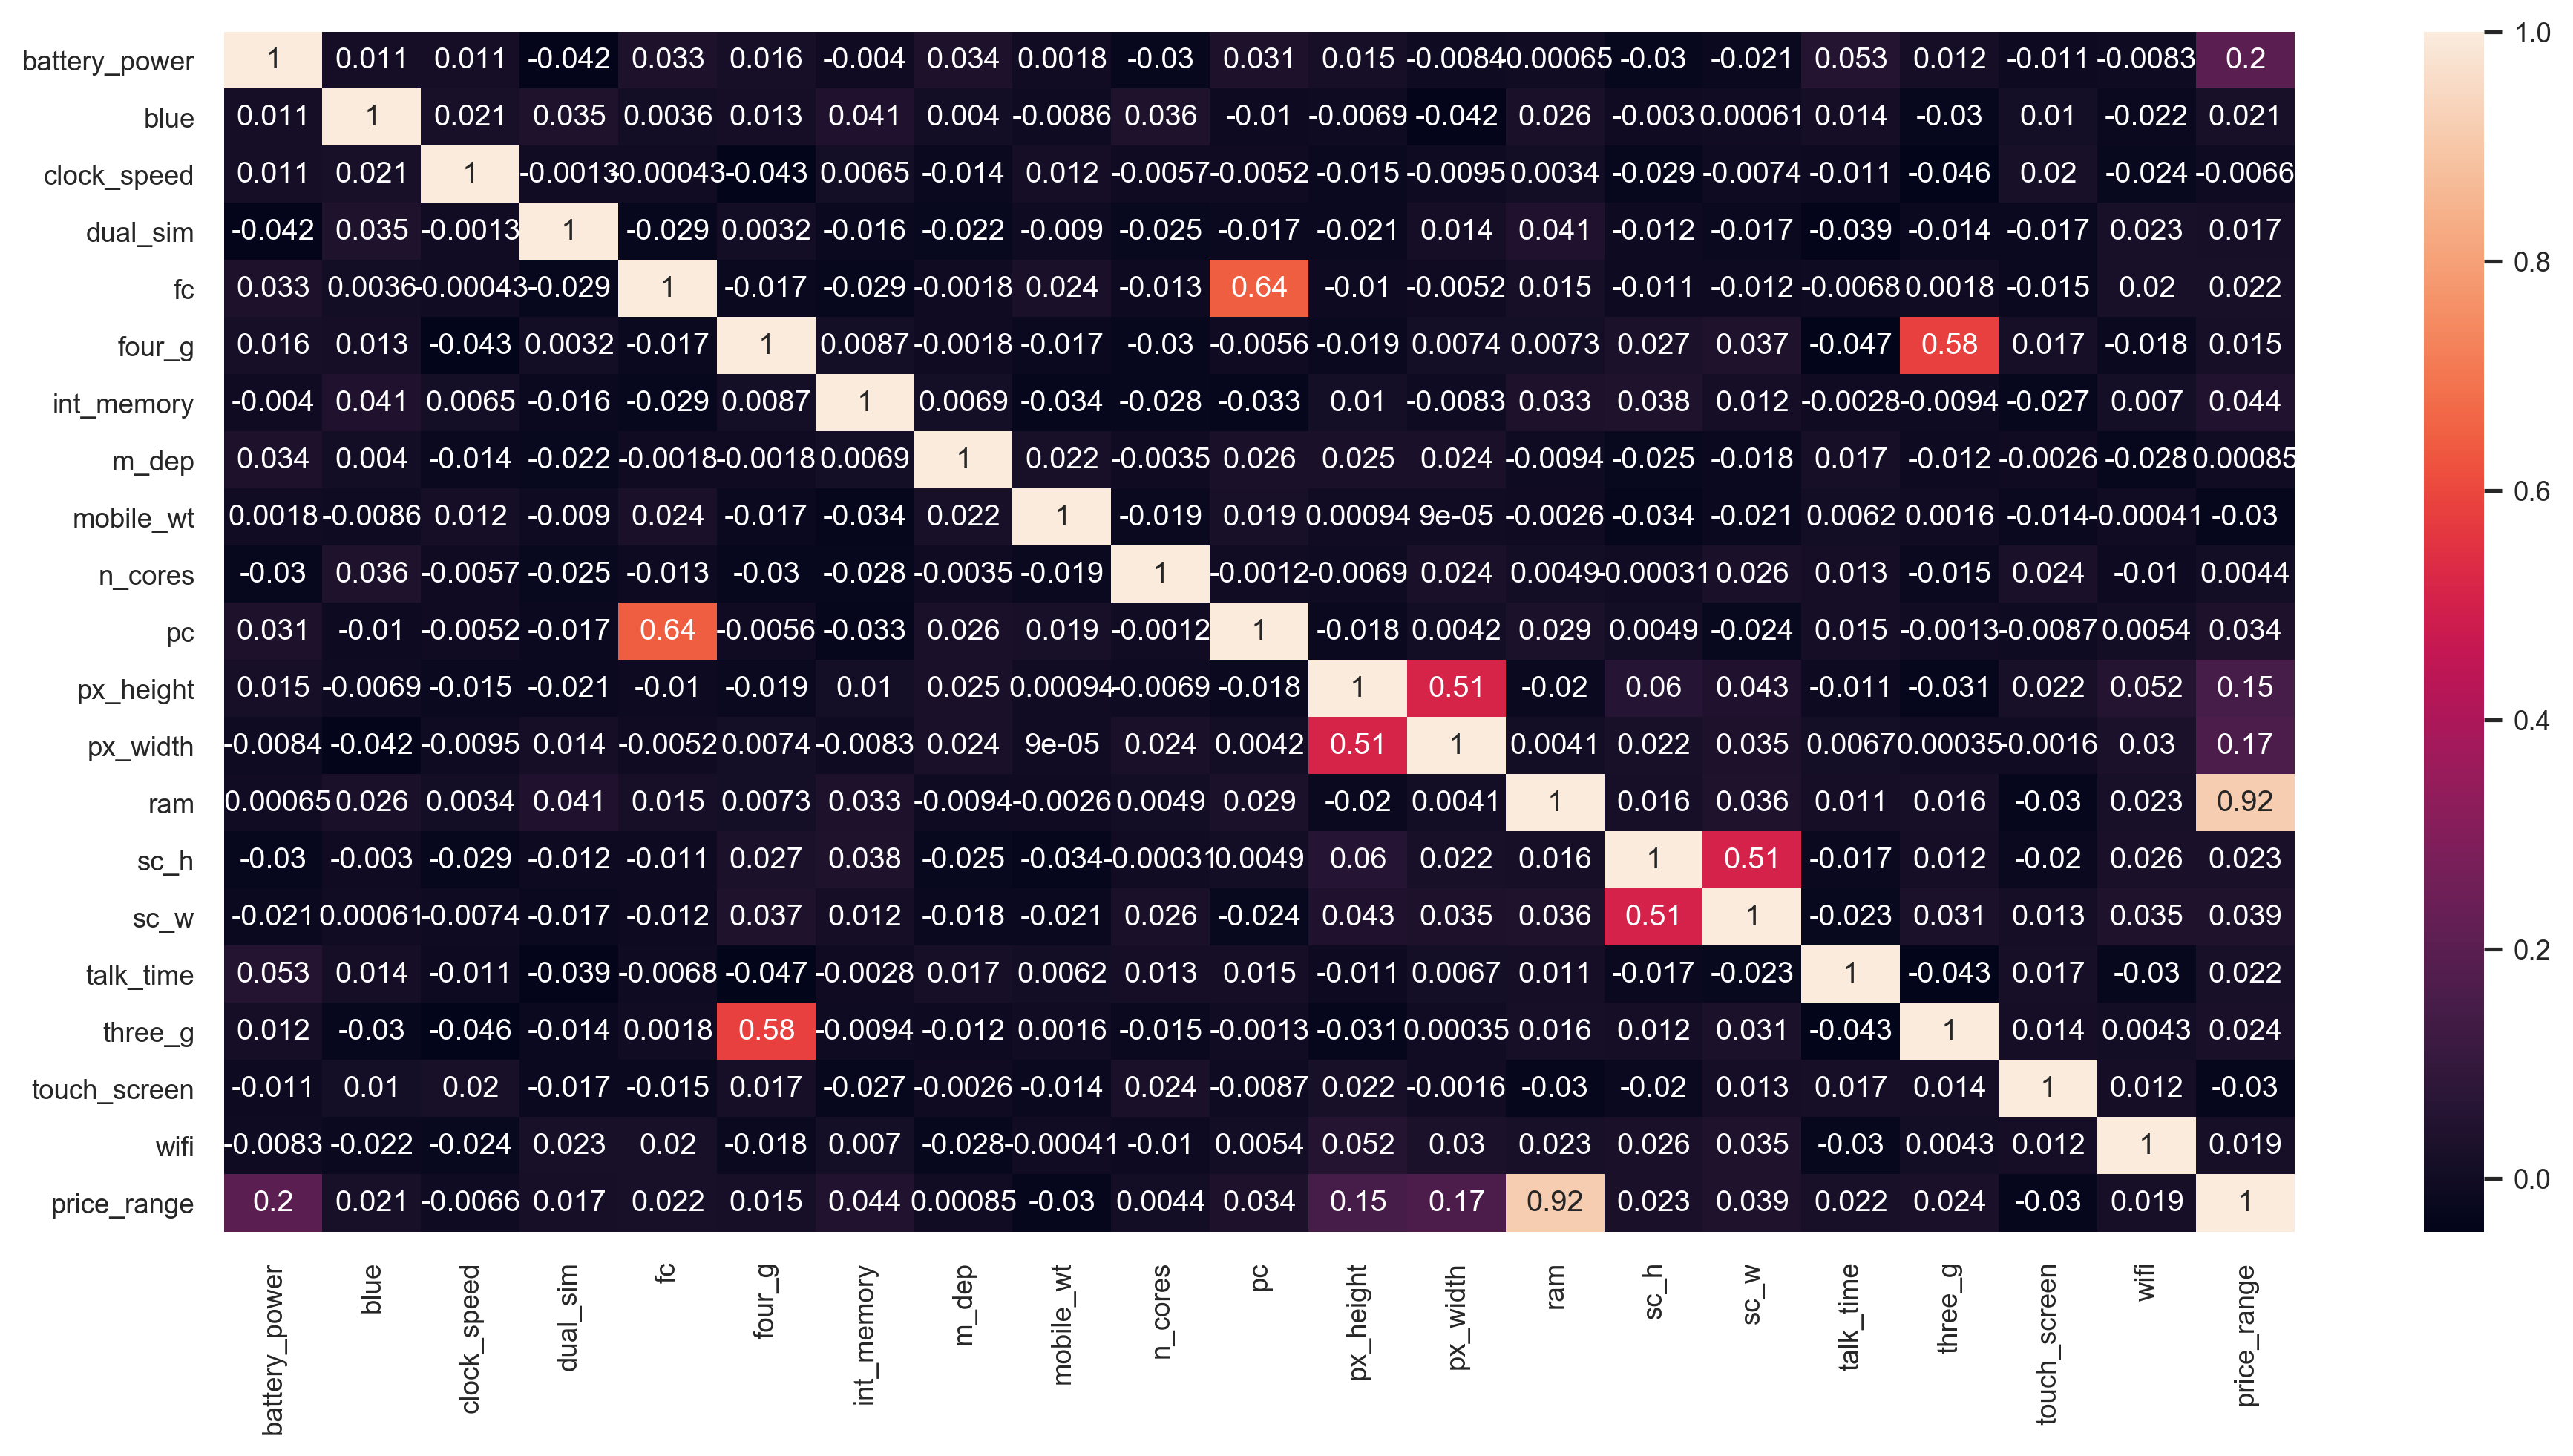

In [50]:
sns.set(font_scale=0.8)
plt.figure(figsize=(15,7), dpi=300)
sns.heatmap(dataset.corr(), annot=True)
plt.savefig("img/06_corr_dataset_bs43tw.png")

In [63]:
def decisonTree_graph_accuary(dataframe, criterion_value, graph_name):
    X = dataframe.loc[:, dataframe.columns != 'price_range']
    y = dataframe.loc[:, dataframe.columns == 'price_range']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

    clf = tree.DecisionTreeClassifier(class_weight=None, criterion=criterion_value)
    clf = clf.fit(X_train, y_train)

    dot_data = tree.export_graphviz(clf, out_file=None) 
    graph = graphviz.Source(dot_data)
    graph.render("img/"+graph_name)

    y_pred = clf.predict(X_test)
    accuracy_scr = accuracy_score(y_test,y_pred)*100
    print("Criterion: {}\nAccuracy is: {}".format(criterion_value,accuracy_scr ) )
    

In [69]:
dataset_fe = dataset.copy()
dataset_fe = dataset_fe.drop(columns=["blue","dual_sim","four_g","three_g","touch_screen","wifi","sc_h","sc_w","m_dep","mobile_wt"])
#plt.figure(figsize=(15,7), dpi=300)
#sns.heatmap(dataset_fe.corr(), annot=True)
#plt.savefig("img/08_corr_dataset_fe.png")

In [82]:
dataset_group = dataset.copy()
dataset_group = dataset[["battery_power","int_memory","n_cores","pc","px_width","ram","bs43tw", "price_range"]]

In [104]:
print(list(dataset.columns))
decisonTree_graph_accuary(dataset, "gini", "tree0_dataset")
decisonTree_graph_accuary(dataset, "entropy", "tree0_dataset")

['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi', 'price_range', 'bs43tw']
Criterion: gini
Accuracy is: 81.0
Criterion: entropy
Accuracy is: 84.33333333333334


In [100]:
print(list(dataset_fe.columns))
decisonTree_graph_accuary(dataset_fe, "gini", "tree1_dataset_fe")
decisonTree_graph_accuary(dataset_fe, "entropy", "tree1_dataset_fe")

['battery_power', 'clock_speed', 'fc', 'int_memory', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'talk_time', 'price_range', 'bs43tw']
Criterion: gini
Accuracy is: 81.66666666666667
Criterion: entropy
Accuracy is: 84.16666666666667


In [98]:
print(list(dataset_group.columns))
decisonTree_graph_accuary(dataset_group, "gini", "tree2_dataset_group")
decisonTree_graph_accuary(dataset_group, "entropy", "tree2_dataset_group")

['battery_power', 'int_memory', 'n_cores', 'pc', 'px_width', 'ram', 'bs43tw', 'price_range']
Criterion: gini
Accuracy is: 82.83333333333334
Criterion: entropy
Accuracy is: 81.33333333333333


In [66]:
dataset.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,bs43tw
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1,000001
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2,111110
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2,111110
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2,100100
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1,101110


In [70]:
dataset_fe.head()

,battery_power,clock_speed,fc,int_memory,n_cores,pc,px_height,px_width,ram,talk_time,price_range,bs43tw
0,842,2.2,1,7,2,2,20,756,2549,19,1,000001
1,1021,0.5,0,53,3,6,905,1988,2631,7,2,111110
2,563,0.5,2,41,5,6,1263,1716,2603,9,2,111110
3,615,2.5,0,10,6,9,1216,1786,2769,11,2,100100
4,1821,1.2,13,44,2,14,1208,1212,1411,15,1,101110


tree_X = dataset.loc[:, dataset.columns != 'price_range']
tree_y = dataset.loc[:, dataset.columns == 'price_range']

X_train_tree, X_test_tree, y_train_tree, y_test_tree = train_test_split(tree_X, tree_y, test_size = 0.3, random_state = 100)

clf = tree.DecisionTreeClassifier(class_weight=None, criterion="gini")
clf = clf.fit(X_train_tree, y_train_tree)

dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data)
graph.render("img/tree")

y_pred = clf.predict(X_test_tree)
print("Accuracy is: {}".format(accuracy_score(y_test_tree,y_pred)*100))

tree_X_fe = dataset_fe.loc[:, dataset_fe.columns != 'price_range']
tree_y_fe = dataset_fe.loc[:, dataset_fe.columns == 'price_range']

X_train_tree_fe, X_test_tree_fe, y_train_tree_fe, y_test_tree_fe = train_test_split(tree_X_fe, tree_y_fe, test_size = 0.3, random_state = 100)

clf_fe = tree.DecisionTreeClassifier(class_weight=None, criterion="gini")
clf_fe = clf_fe.fit(X_train_tree_fe, y_train_tree_fe)

dot_data = tree.export_graphviz(clf_fe, out_file=None) 
graph = graphviz.Source(dot_data)
graph.render("img/tree2")

y_pred_fe = clf_fe.predict(X_test_tree_fe)
print("Accuracy is fe: {}".format(accuracy_score(y_test_tree_fe,y_pred_fe)*100))

feature_c = ['battery_power','int_memory','n_cores','pc','px_width','ram','bs43tw', 'price_range']
dataset_c = dataset[feature_c]

tree_X_c = dataset_c.loc[:, dataset_c.columns != 'price_range']
tree_y_c = dataset_c.loc[:, dataset_c.columns == 'price_range']

X_train_tree_c, X_test_tree_c, y_train_tree_c, y_test_tree_c = train_test_split(tree_X_c, tree_y_c, test_size = 0.3, random_state = 100)

clf_c = tree.DecisionTreeClassifier(class_weight=None, criterion="gini")
clf_c = clf_c.fit(X_train_tree_c, y_train_tree_c)

dot_data = tree.export_graphviz(clf_c, out_file=None) 
graph = graphviz.Source(dot_data)
graph.render("img/tree3")

y_pred_c = clf_c.predict(X_test_tree_c)
print("Accuracy is fe: {}".format(accuracy_score(y_test_tree_c,y_pred_c)*100))

## Data Visualization & Analysis

In [ ]:
#Which kind of problem are we facing? Classification or regression?
#How is each attribute affecting price? 

In [ ]:
#Write your analysis here: